# **Plotting the theoretical $w(\theta)$ for a given cosmology and a set of redshift distributions**

This notebook plots the theoretical angular correlation function \( w(\theta) \) based on a given cosmology and redshift distributions.


In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2024-12-21 05:56:01.837687: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


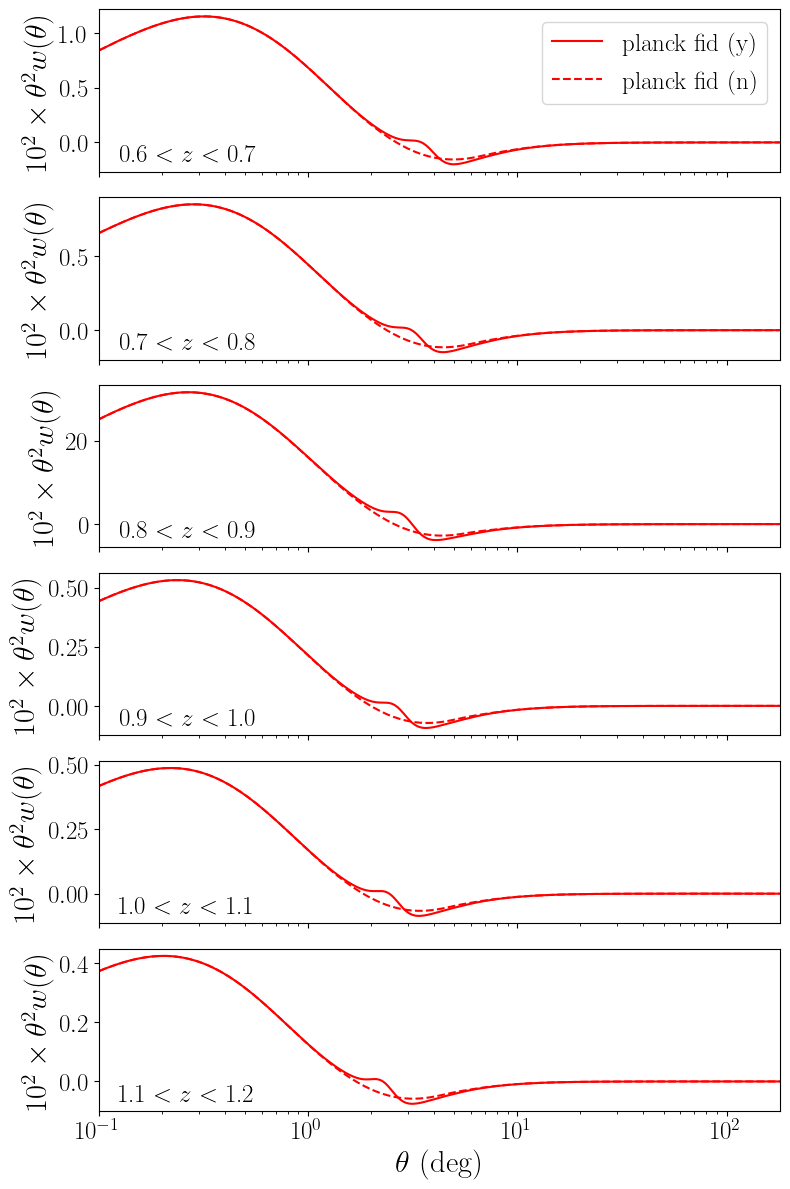

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
from utils_template import PowerSpectrumMultipoles
from utils import RedshiftDistributions

def load_wtheta_template(path_template, bin_z):
    wtheta_template = {}
    for component in ['bb', 'bf', 'ff']:
        file_path = os.path.join(path_template, f'wtheta_{component}_bin{bin_z}.txt')
        data = np.loadtxt(file_path)
        theta = data[:, 0]
        wtheta_template[component] = data[:, 1]
    return theta, wtheta_template

galaxy_bias = {0: 1, 1: 1, 2: 10, 3: 1, 4: 1, 5: 1}

# cosmology_templates = ['mice', 'planck']
# nz_flags = ['fid']

# cosmology_templates = ['planck']
# nz_flags = ['fid', 'clusteringz']

cosmology_templates = ['planck']
nz_flags = ['fid']

colors = {
    ('mice', 'fid'): 'blue', 
    ('mice', 'clusteringz'): 'green', 
    ('planck', 'fid'): 'red', 
    ('planck', 'clusteringz'): 'orange'
}

nbins = {'fid': 6, 'clusteringz': 4}
linestyle = {'y': '-', 'n': '--'}

nbins_max = max(nbins[nz_flag] for nz_flag in nz_flags)
text_added = {bin_z: False for bin_z in range(nbins_max)}

fig, axs = plt.subplots(nbins_max, 1, figsize=(8, 2 * nbins_max), sharex=True)

for cosmology_template in cosmology_templates:
    for nz_flag in nz_flags:
        z_edges = RedshiftDistributions(nz_flag, verbose=False).z_edges
        color = colors[(cosmology_template, nz_flag)]
        
        wtheta = {}
        wtheta_bb = {}
        wtheta_bf = {}
        wtheta_ff = {}

        for bin_z in range(nbins[nz_flag]):
            ax = axs[bin_z]
            
            for include_wiggles in ['y', 'n']:
                
                path_template = PowerSpectrumMultipoles(
                    include_wiggles='' if include_wiggles == 'y' else '_nowiggles',
                    nz_flag=nz_flag,
                    cosmology_template=cosmology_template,
                    verbose=False,
                    lazy_init=True
                ).path_template
                
                label = cosmology_template + ' ' + nz_flag + ' (' + include_wiggles + ')'
                
                theta, wtheta_template = load_wtheta_template(path_template, bin_z)
                
                wtheta_bb[bin_z] = wtheta_template['bb']
                wtheta_bf[bin_z] = wtheta_template['bf']
                wtheta_ff[bin_z] = wtheta_template['ff']
                
                wtheta[bin_z] = galaxy_bias[bin_z] ** 2 * wtheta_bb[bin_z] + galaxy_bias[bin_z] * wtheta_bf[bin_z] + wtheta_ff[bin_z]
                
                ax.semilogx(theta * 180 / np.pi, 100 * (theta * 180 / np.pi) * wtheta[bin_z], label=label, color=color, linestyle=linestyle[include_wiggles])

            z_edge = z_edges[bin_z]
            if bin_z == nbins_max - 1:
                ax.set_xlabel(r'$\theta$ (deg)', fontsize=22)
            ax.set_ylabel(r'$10^2 \times \theta^2 w(\theta)$', fontsize=22)
            ax.set_xlim([10**-1, 180])
            ax.tick_params(axis='x', labelsize=18)
            ax.tick_params(axis='y', labelsize=18)

            if nbins[nz_flag] == nbins_max and not text_added[bin_z]:
                ax.text(0.13, 0.1, f'{z_edge[0]} $< z <$ {z_edge[1]}', ha='center', va='center', transform=ax.transAxes, fontsize=18)
                text_added[bin_z] = True

        # if cosmology_template == cosmology_templates[0]:  # Add legend only to the first cosmology template
        axs[0].legend(loc='upper right', fontsize=18, ncol=len(cosmology_templates) * len(nz_flags))

plt.tight_layout()
plt.show()


In [ ]:
pk_calculator.path_template